# downloading the libriaries

In [1]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [2]:
!pip install arabic_reshaper

In [3]:
!pip install wordcloud

In [4]:
!apt install fontconfig
!fc-cache -fv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fontconfig is already the newest version (2.13.1-4.2ubuntu5).
fontconfig set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/

In [5]:
!pip install tensorflow

In [6]:
!sudo apt install msttcorefonts -qq

The following additional packages will be installed:
  cabextract distro-info libfontenc1 libmspack0 python3-chardet
  python3-debconf python3-debian python3-distro-info python3-distupgrade
  python3-update-manager python3-yaml ubuntu-advantage-tools ubuntu-pro-client
  ubuntu-pro-client-l10n ubuntu-release-upgrader-core update-manager-core
  update-notifier-common xfonts-encodings xfonts-utils zstd
Suggested packages:
  shunit2
The following NEW packages will be installed:
  cabextract distro-info libfontenc1 libmspack0 python3-chardet
  python3-debconf python3-debian python3-distro-info python3-distupgrade
  python3-update-manager python3-yaml ttf-mscorefonts-installer
  ubuntu-advantage-tools ubuntu-pro-client ubuntu-pro-client-l10n
  ubuntu-release-upgrader-core update-manager-core update-notifier-common
  xfonts-encodings xfonts-utils zstd
0 upgraded, 21 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,361 kB of archives.
After this operation, 9,913 kB of additional

# Pre processing


In [9]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import arabic_reshaper
from IPython.display import display # Importing display

# Load dataset
data = pd.read_csv('/content/Egypt.csv')

# Text cleaning and preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

data['clean_text'] = data['tweet'].apply(preprocess_text)

# Initialize WordNetLemmatizer outside the function
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('arabic'))

# Assuming 'get_display' is meant to be 'display' for displaying Arabic
def reshape_and_display(text): # New function to reshape and display
    text = arabic_reshaper.reshape(text)
    display(text) # Correctly display Arabic characters


def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['clean_text'] = data['clean_text'].apply(tokenize)


In [10]:
data.sample(5)

,tweet,target,clean_text
105,مصر تُعلن عن مشروع لتغطية الأهرامات بالزجاج لح...,0,مصر تعلن مشروع لتغطية الأهرامات بالزجاج لحمايتها
28,مصر تُعلن عن تطوير تقنية للتحكم في الطقس,0,مصر تعلن تطوير تقنية للتحكم الطقس
70,"مصر تطلق مشروع ""حياة كريمة"" لتحسين البنية التح...",1,مصر تطلق مشروع حياة كريمة لتحسين البنية التحتي...
59,تطوير تقنية للتواصل مع الكائنات الفضائية.,0,تطوير تقنية للتواصل الكائنات الفضائية
140,مصر تُعلن عن اكتشاف هرم زجاجي في الصحراء الغربية.,0,مصر تعلن اكتشاف هرم زجاجي الصحراء الغربية


In [11]:
data.shape

(150, 3)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet       150 non-null    object
 1   target      150 non-null    int64 
 2   clean_text  150 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.6+ KB


In [13]:
# missing values
data.isnull().sum()

,0
tweet,0
target,0
clean_text,0


In [14]:
# check for duplicate values
data.duplicated().sum()

0

# EDA

In [15]:
data['target'].value_counts()

,count
target,
1,77
0,73


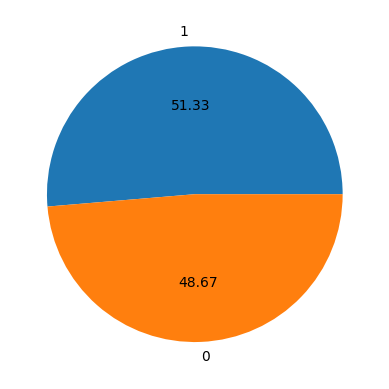

In [16]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['1','0'],autopct="%0.2f")
plt.show()

In [17]:
# num of characters
data['num_characters'] = data['tweet'].apply(len)

In [18]:
# num of words
data['num_words'] = data['tweet'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
# num of sentences
data['num_sentences'] = data['tweet'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
data.head()

,tweet,target,clean_text,num_characters,num_words,num_sentences
0,مصر تنظم مؤتمر عالمي لدعم البيئة,1,مصر تنظم مؤتمر عالمي لدعم البيئة,32,6,1
1,برنامج الإصلاح الاقتصادي يؤتي ثماره,0,برنامج الإصلاح الاقتصادي يؤتي ثماره,35,5,1
2,التكنولوجيا تعزز خدمات الحكومة الإلكترونية,1,التكنولوجيا تعزز خدمات الحكومة الإلكترونية,42,5,1
3,الحكومة تنجح في خفض معدلات البطالة,1,الحكومة تنجح خفض معدلات البطالة,34,6,1
4,زيادة الاستثمارات الأجنبية في مصر,1,زيادة الاستثمارات الأجنبية مصر,33,5,1


In [21]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,150.000000,150.000000,150.0
mean,50.053333,9.220000,1.0
std,10.079407,1.979323,0.0
min,32.000000,5.000000,1.0
25%,42.250000,8.000000,1.0
50%,49.000000,9.000000,1.0
75%,56.000000,10.000000,1.0
max,88.000000,17.000000,1.0


# visualizing the data with wordcloud

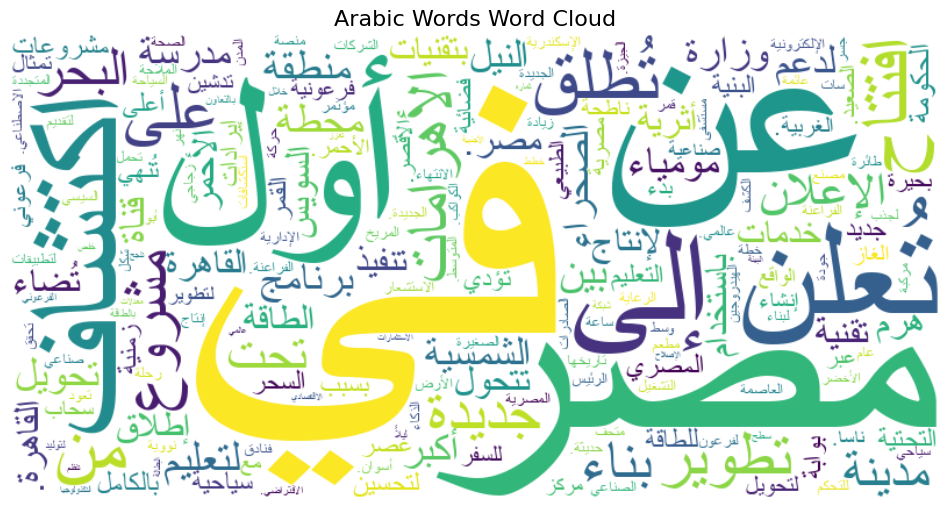

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Extract the 'tweet' column
tweets = data['tweet']

# Tokenize and count word frequencies
words = ' '.join(tweets.astype(str)).split()
word_counts = Counter(words)

# Filter Arabic words and consider frequencies
arabic_words = {word: freq for word, freq in word_counts.items() if '\u0621' <= word <= '\u064A'}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='arial').generate_from_frequencies(arabic_words)

# Display the word cloud using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Arabic Words Word Cloud', fontsize=16)
plt.show()

# Feature engineering

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['clean_text'])
y = data['target']


# Splitting the data to train and test and using logistic regression , RNN, Naive Bayes and SVM model


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression

In [44]:
# Training the Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score, classification_report

logistic_accuracy = clf.score(X, y)

print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")


Logistic Regression Accuracy: 0.98


SVM

In [26]:
from sklearn.svm import SVC

# Training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)


SVC(kernel='linear')

In [27]:
# Evaluation for SVM
svm_accuracy = svm_model.score(X, y)

print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Accuracy: 1.00


Naive Bayes

In [33]:
from sklearn.naive_bayes import MultinomialNB

nb= MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [35]:
nb_accuracy = nb.score(X, y)

print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")

Naive Bayes Accuracy: 0.97


RNN

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
X_train_rnn = X_train.toarray().reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.toarray().reshape(X_test.shape[0], 1, X_test.shape[1])

In [29]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))  # Adjust units as needed
model.add(Dense(1, activation='sigmoid'))  # For binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_rnn, y_train, epochs=10, batch_size=32)  # Adjust epochs and batch size
_, accuracy = model.evaluate(X_test_rnn, y_test)
print('Accuracy: {}'.format(accuracy))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4860 - loss: 0.6927
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8848 - loss: 0.6836
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9848 - loss: 0.6734 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9852 - loss: 0.6637
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.6530
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.6415 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.6302 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.6165 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.6015 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.5852 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.8667 - loss: 0.6432
Accuracy: 0.8666666746139526


# Giving the model sentence to predict it

In [42]:
test_sentence= "اففتاح اول مطعم تحت الماء في مصر"

# Preprocess the text
clean_text = tokenize(preprocess_text(test_sentence))

# Vectorize the preprocessed text
text_vectorized = tfidf_vectorizer.transform([clean_text])

# Reshape for RNN similar to X_train_rnn and X_test_rnn
text_vectorized_rnn = text_vectorized.toarray().reshape(text_vectorized.shape[0], 1, text_vectorized.shape[1])

# Predict using each model
logistic_prediction = clf.predict(text_vectorized)
svm_prediction = svm_model.predict(text_vectorized)
rnn_prediction = model.predict(text_vectorized_rnn)  # Now using the reshaped input
nb_prediction = nb.predict(text_vectorized)

# Map numerical outputs to sentiment labels for display
sentiment_mapping = {1: 'positive', 0: 'negative'}

# Convert numerical outputs to sentiment labels
logistic_sentiment = sentiment_mapping.get(logistic_prediction[0])
svm_sentiment = sentiment_mapping.get(svm_prediction[0])
nb_sentiment = sentiment_mapping.get(nb_prediction[0])

# Convert RNN prediction to sentiment label using a threshold (e.g., 0.5)
rnn_sentiment = sentiment_mapping.get(1 if rnn_prediction[0][0] >= 0.5 else 0)

# Print the predicted sentiments for all models
print(f"Logistic Regression Predicted Sentiment: {logistic_sentiment}")
print(f"SVM Predicted Sentiment: {svm_sentiment}")
print(f"RNN Predicted Sentiment: {rnn_sentiment}")
print(f"Naive Bayes Predicted Sentiment: {nb_sentiment}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Logistic Regression Predicted Sentiment: negative
SVM Predicted Sentiment: negative
RNN Predicted Sentiment: negative
Naive Bayes Predicted Sentiment: negative
